In [1]:
import os
import re
import sys
import toml
from dotenv import load_dotenv
import gokart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import toml
from pipelines import HypergradEstimationPipeline
from tasks import TrainModel, CreateDummyOracle
from luigi.configuration.toml_parser import LuigiTomlParser
import matplotlib as mpl
from luigi import DictParameter
import json
# Enable LaTeX rendering for text, allowing usage of \texttt in legend labels
# mpl.rcParams["text.usetex"] = False
# mpl.rcParams["font.family"] = "serif"
from luigi.cmdline_parser import CmdlineParser
import os

os.environ['LUIGI_CONFIG_PARSER'] = 'toml'


In [2]:
from conf.paper_tune_alpha_and_scale import get_config

# settings = [
#     "neumann",
#     "unroll",
#     "vr_no_km",
#     "grazzi_const",
#     "vr_km_const",
#     "grazzi_linear",
#     "vr_km_linear",
# ]


In [3]:
results = {}
# for a in [1.0, 2.0, 5.0, 10.0]:
# for a in [10.0]:
    # for mu in [0.1, 0.2, 0.5, 0.8, 0.9]:
    # for mu in [0.9]:

config = get_config()

os.makedirs('.tmp', exist_ok=True)
with open(f'.tmp/params_ipynb_20250224.toml', 'w') as f:
    toml.dump(config, f)

gokart.add_config(f'.tmp/params_ipynb_20250224.toml')
# task_pipeline = gokart.build(HypergradEstimationPipeline(), return_value=True)
task_pipeline = HypergradEstimationPipeline()
_, task_plot, _ = task_pipeline.requires()

result = task_plot.load()['task_sample']

./resources/SampleHyperGradEstimations_b76889e039baf395b48a3ae2d90e766f.pt


In [4]:
config['HypergradEstimationPipeline']['params']

[{'a': 0.0, 'scale': 0.001},
 {'a': 0.0001, 'scale': 0.001},
 {'a': 0.001, 'scale': 0.001},
 {'a': 0.01, 'scale': 0.001},
 {'a': 0.1, 'scale': 0.001},
 {'a': 1.0, 'scale': 0.001},
 {'a': 0.0, 'scale': 0.01},
 {'a': 0.0001, 'scale': 0.01},
 {'a': 0.001, 'scale': 0.01},
 {'a': 0.01, 'scale': 0.01},
 {'a': 0.1, 'scale': 0.01},
 {'a': 1.0, 'scale': 0.01},
 {'a': 0.0, 'scale': 0.1},
 {'a': 0.0001, 'scale': 0.1},
 {'a': 0.001, 'scale': 0.1},
 {'a': 0.01, 'scale': 0.1},
 {'a': 0.1, 'scale': 0.1},
 {'a': 1.0, 'scale': 0.1},
 {'a': 0.0, 'scale': 1.0},
 {'a': 0.0001, 'scale': 1.0},
 {'a': 0.001, 'scale': 1.0},
 {'a': 0.01, 'scale': 1.0},
 {'a': 0.1, 'scale': 1.0},
 {'a': 1.0, 'scale': 1.0}]

In [5]:
result.keys()

dict_keys(['vr_no_km(scale=0.001,a=0.0)', 'vr_no_km(scale=0.001,a=0.0001)', 'vr_no_km(scale=0.001,a=0.001)', 'vr_no_km(scale=0.001,a=0.01)', 'vr_no_km(scale=0.001,a=0.1)', 'vr_no_km(scale=0.001,a=1.0)', 'vr_no_km(scale=0.01,a=0.0)', 'vr_no_km(scale=0.01,a=0.0001)', 'vr_no_km(scale=0.01,a=0.001)', 'vr_no_km(scale=0.01,a=0.01)', 'vr_no_km(scale=0.01,a=0.1)', 'vr_no_km(scale=0.01,a=1.0)', 'vr_no_km(scale=0.1,a=0.0)', 'vr_no_km(scale=0.1,a=0.0001)', 'vr_no_km(scale=0.1,a=0.001)', 'vr_no_km(scale=0.1,a=0.01)', 'vr_no_km(scale=0.1,a=0.1)', 'vr_no_km(scale=0.1,a=1.0)', 'vr_no_km(scale=1.0,a=0.0)', 'vr_no_km(scale=1.0,a=0.0001)', 'vr_no_km(scale=1.0,a=0.001)', 'vr_no_km(scale=1.0,a=0.01)', 'vr_no_km(scale=1.0,a=0.1)', 'vr_no_km(scale=1.0,a=1.0)'])

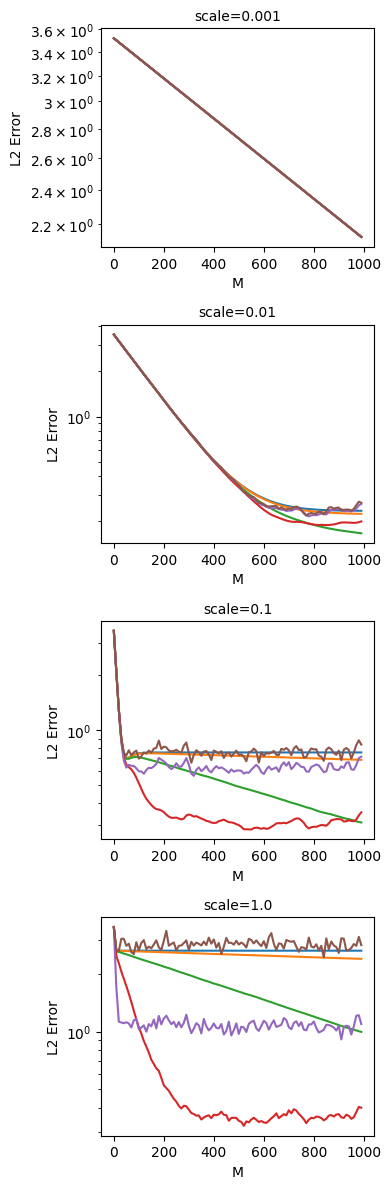

In [6]:
xlabel = 'M'
ylabel = 'L2 Error'
xscale = 'linear'
yscale = 'log'
output_dir = '.'

# as_ = [1, 2, 5, 10]
# as_ = [1, 5, 10]
# mus = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.9]
# mus = [0.01, 0.05, 0.1,  0.5]
plot_every = 10

# as_ = [0.001, 0.01, 0.1]
# mus =  [0.01, 0.1, 0.9]
# ylims = {
#     # 0.001:(1e1, 1e4),
#     0.01:(4.205986190934075, 662.2687793724828),
#     # 0.05:(1e-0, 1e3),
#     0.1:(0.05148369716604859, 72.9544346490431),
#     # 0.5:(1e-1, 1e2),
# }

# scales = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
scales = [0.001,0.01, 0.1, 1.0]
# as_ = [0., 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 5e-1, 0.9, 1e0]
as_ = (0.,0.0001, 0.001,0.01,0.1,1.0)
# Compute global min and max for y values
global_ymin = np.inf
global_ymax = -np.inf

# Determine grid dimensions
n_rows = len(scales)

# Create a figure and an array of axes with the specified grid
fig, axes = plt.subplots(n_rows, 1, figsize=(4, n_rows*3), squeeze=False)

# Loop over the parameter combinations and plot on each corresponding axis
for i, scale in enumerate(scales):
    ax = axes[i][0]
    for j, a in enumerate(as_):
        task_name = f'scale={scale}'
        key = f'vr_no_km(scale={scale},a={a})'
        label = f'a={1-a}'

        item = result[key]
        ax.grid(False)

        means = item['mean']
        param = item['param']
        xs = np.arange(0, len(means), plot_every)
        ys = means[xs]

        # if param['a'] in (0.,0.001,0.01,0.1,1.0):
        # ax.plot(xs, ys, label=label)
        ax.plot(xs, ys, label=label)
        # To add confidence intervals, uncomment below:
        # stds = item['std'][xs]
        # ax.fill_between(xs, ys - stds, ys + stds, alpha=0.2)
        # stds = item['std'][xs]
        # ax.fill_between(xs, ys - stds, ys + stds, alpha=0.2)

        ax.set_title(task_name, fontsize=10)
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        # print ylim
        ymin, ymax = ax.get_ylim()
        global_ymin = min(global_ymin, ymin)
        global_ymax = max(global_ymax, ymax)
        # Optionally add a legend if needed
        # ax.legend()


# Adjust layout to prevent overlapping elements
fig.tight_layout()

# Save the figure as a single PDF file
os.makedirs(output_dir, exist_ok=True)
pdf_path = os.path.join(output_dir, 'tiled_plots.pdf')
fig.savefig(pdf_path)

plt.show()

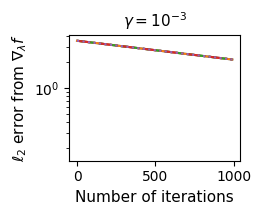

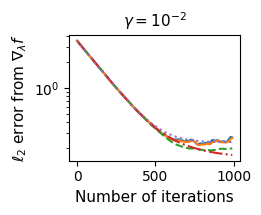

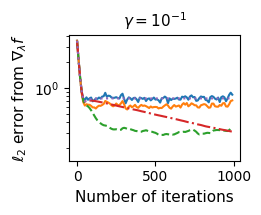

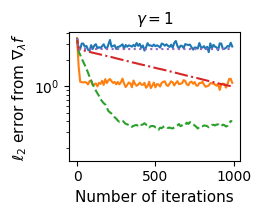

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Settings and parameters
xlabel = 'Number of iterations'
ylabel = r'$\ell_2$ error from $\nabla_\lambda f$'
xscale = 'linear'
yscale = 'log'
output_dir = '.'
plot_every = 10

scales = [0.001, 0.01, 0.1, 1.0]
as_ = [0., 0.001, 0.01, 0.1, 1.0][::-1]

scale_to_title = {
    0.001: r'$\gamma=10^{-3}$',
    0.01: r'$\gamma=10^{-2}$',
    0.1: r'$\gamma=10^{-1}$',
    1.0: r'$\gamma=1$',
}
figscale = 0.9
fontsize = 11
# Assume "result" is a dictionary with keys of the form:
#   "vr_no_km(scale={scale},a={a})"
# and each value is a dict with 'mean' (and optionally 'std') and 'param'

# Second pass: For each scale, create a figure with curves for all a-values
os.makedirs(output_dir, exist_ok=True)
linestyles = ['dotted', 'dashdot', 'dashed', 'solid', 'solid'][::-1]
paths = []
for scale in scales:
    # fig, ax = plt.subplots(figsize=(3*scale, 2.5*scale))
    fig, ax = plt.subplots(figsize=(3*figscale, 2.5*figscale))
    ax.grid(False)
    task_name = f'scale={scale}'
    title = f'γ={scale}'
    assert len(as_) == len(linestyles)
    for a, linestyle in zip(as_, linestyles):
        key = f'vr_no_km(scale={scale},a={a})'
        item = result[key]
        means = item['mean']
        xs = np.arange(0, len(means), plot_every)
        ys = means[xs]
        label = f'α={1-a}'
        ax.plot(xs, ys, label=label, linestyle=linestyle)
        # Uncomment to add confidence intervals:
        # stds = item['std'][xs]
        # ax.fill_between(xs, ys - stds, ys + stds, alpha=0.1)

    ax.set_title(scale_to_title[scale], fontsize=fontsize)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_ylim(global_ymin, global_ymax)
    # ax.legend()  # Optionally include a legend
    fig.tight_layout()

    # Save the individual plot to a PDF file with a unique name
    pdf_path = os.path.join(output_dir, f"{task_name.replace('=', '-').replace(', ', '_')}.pdf")
    fig.savefig(pdf_path)
    paths.append(pdf_path)
    plt.show(fig)  # Display and close the figure to free memory

In [8]:
print(f"tsz {' '.join(paths)}")

tsz ./scale-0.001.pdf ./scale-0.01.pdf ./scale-0.1.pdf ./scale-1.0.pdf


In [9]:
def get_legend(labels, markers=None, colors=None, styles=None, markersizes=None, ncol=1):
    if markersizes is None:
        markersizes = [None] * len(labels)
    if styles is None:
        styles = [None] * len(labels)
    if colors is None:
        colors = [None] * len(labels)
    if markers is None:
        markers = [None] * len(labels)

    assert len(labels) == len(markers) == len(colors)

    fig, ax = plt.subplots()
    for label, marker, color, style, markersize in zip(labels, markers, colors, styles, markersizes):
        ax.plot(np.ones(1), np.ones(1), label=label, marker=marker, color=color, linestyle=style, markersize=markersize)
    legends = []
    for line, line_name in zip(*fig.axes[0].get_legend_handles_labels()):
        legends.append(line)
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.axis('off')
    legend = ax2.legend(legends, labels, frameon=False, loc='lower center', ncol=ncol)
    fig_legend = legend.figure
    fig_legend.canvas.draw()

    return legend

def get_tight_legend_bbox_inches(legend):
    bbox = legend.get_window_extent().transformed(legend.figure.dpi_scale_trans.inverted())
    return bbox

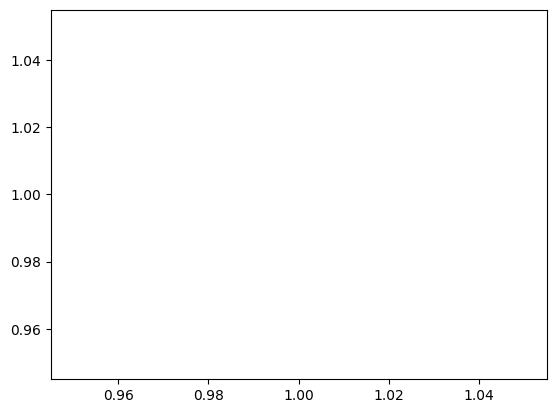

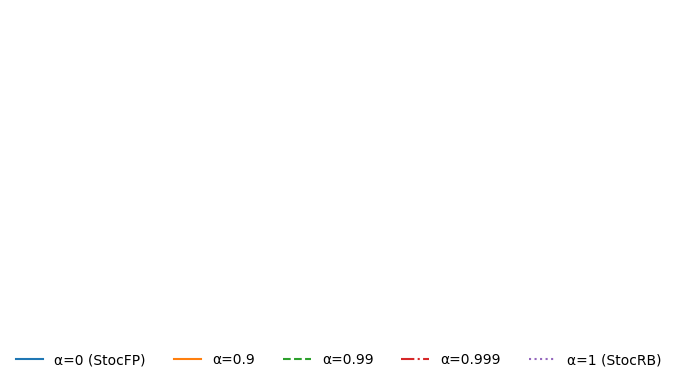

In [10]:
alphas = as_
labels = [
    'α=1 (StocRB)',
    'α=0.999',
    'α=0.99',
    'α=0.9',
    'α=0 (StocFP)',
][::-1]
legend = get_legend(labels=labels, styles=linestyles, ncol=len(alphas))

bbox = get_tight_legend_bbox_inches(legend)
bbox = bbox.from_extents(bbox.xmin, bbox.ymin, bbox.xmax, bbox.ymax * 1.02)  # Increase the height by 20%

legend.figure.savefig(os.path.join(output_dir, f"legends_synth.pdf"), dpi="figure", bbox_inches=bbox)
# legend.figure.savefig(os.path.join(out_dir, "legends_cleansing.pdf"), dpi="figure")
